# **Paul Golder - Capstone Project March 2025**
# **Data Extract and Combine

## Objectives

* Import data downloaded from "Kaggle" - review it , clean it, combine it into one file with flags to identify false or true.

## Inputs

* CSV files in source_data files

## Outputs

* csv file in cleaned_data called combined_clean_step1.csv

## Additional Comments

* If you have any additional comments that don't fit in the previous bullets, please state them here. 

---

# Change working directory

In [2]:
import os
current_dir = os.getcwd()
current_dir

'h:\\VScode\\CapStoneProject_2025-1\\3_data_extract_combine'

In [3]:
# check current directory contains the file README.md
if os.path.exists("README.md"):
    print("The file README.md exists in the current directory")
else:
    print("The file README.md does not exist in the current directory")
    print("You are in the directory: ", current_dir)
    print("Changing current directory to its parent directory")
    os.chdir(os.path.dirname(current_dir))
    print("You set a new current directory")
    current_dir = os.getcwd()
    if os.path.exists("README.md"):
        print("The file README.md exists in the current directory")
    else:
        RuntimeError("The file README.md does not exist in the current directory, please check the current directory")
        print("Current Directory =", current_dir)

The file README.md does not exist in the current directory
You are in the directory:  h:\VScode\CapStoneProject_2025-1\3_data_extract_combine
Changing current directory to its parent directory
You set a new current directory
The file README.md exists in the current directory


# Load data from files into Pandas dataframes

Section 1 content

In [1]:
import pandas as pd
import numpy as np
import sklearn.pipeline as Pipeline

In [ ]:
def dataload():
    # load the data
    fake_df = pd.read_csv("source_data/fake.csv")
    true_df = pd.read_csv("source_data/true.csv")
    return fake_df, true_df
true_df = pd.read_csv("source_data/true.csv")
#print datafile name
dfname="true_df"
check_df=true_df
# check for missing values
print(f"Unique Values {dfname}: ", check_df.nunique())
# check for missing values
print("")
print(f"Missing Values {dfname}: ", check_df.isnull().sum())
print("")
check_df.describe()


Unique Values true_df:  title      20826
text       21192
subject        2
date         716
dtype: int64

Missing Values true_df:  title      0
text       0
subject    0
date       0
dtype: int64



,title,text,subject,date
count,21417,21417,21417,21417
unique,20826,21192,2,716
top,Factbox: Trump fills top jobs for his administ...,(Reuters) - Highlights for U.S. President Dona...,politicsNews,"December 20, 2017"
freq,14,8,11272,182


In [68]:
fake_df = pd.read_csv("source_data/fake.csv")
# provide a summary of the data showing count of unique values for each column

#print datafile name
dfname="fake_df"
check_df=fake_df
# check for missing values
print(f"Unique Values {dfname}: ", check_df.nunique())
# check for missing values
print("")
print(f"Missing Values {dfname}: ", check_df.isnull().sum())
print("")
check_df.describe()

Unique Values fake_df:  title      17903
text       17455
subject        6
date        1681
dtype: int64

Missing Values fake_df:  title      0
text       0
subject    0
date       0
dtype: int64



,title,text,subject,date
count,23481,23481,23481,23481
unique,17903,17455,6,1681
top,MEDIA IGNORES Time That Bill Clinton FIRED His...,,News,"May 10, 2017"
freq,6,626,9050,46


In [87]:
# add a column to each dataframe to indicate whether the news is fake or true
true_df["label"] = 1
fake_df["label"] = 0
# combine the two dataframes
combined_temp_df = pd.concat([true_df, fake_df])
#print datafile name
dfname="combined_temp_df"
check_df=combined_temp_df
# check for missing values
print(f"Unique Values {dfname}: ", check_df.nunique())
# check for missing values
print("")
print(f"Missing Values {dfname}: ", check_df.isnull().sum())
print("")
check_df.describe()


Unique Values combined_temp_df:  title      38729
text       38646
subject        8
date        2397
label          2
dtype: int64

Missing Values combined_temp_df:  title      0
text       0
subject    0
date       0
label      0
dtype: int64



,label
count,44898.000000
mean,0.477015
std,0.499477
min,0.000000
25%,0.000000
50%,0.000000
75%,1.000000
max,1.000000


---

In [88]:
# copy the combined dataframe to a new dataframe
combined_df = combined_temp_df.copy()
# rename the text colum "article_text"
combined_df.rename(columns={"text":"article_text"}, inplace=True)

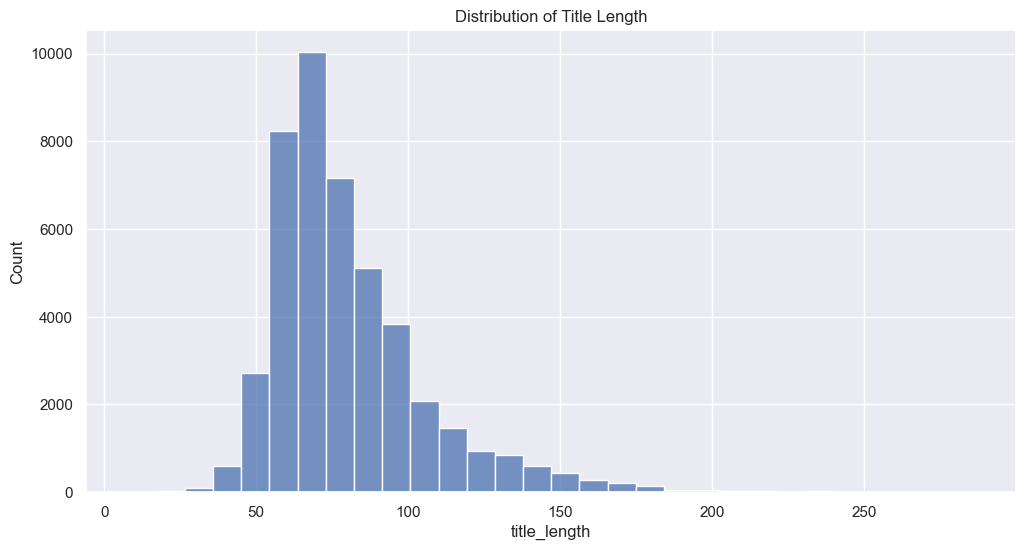

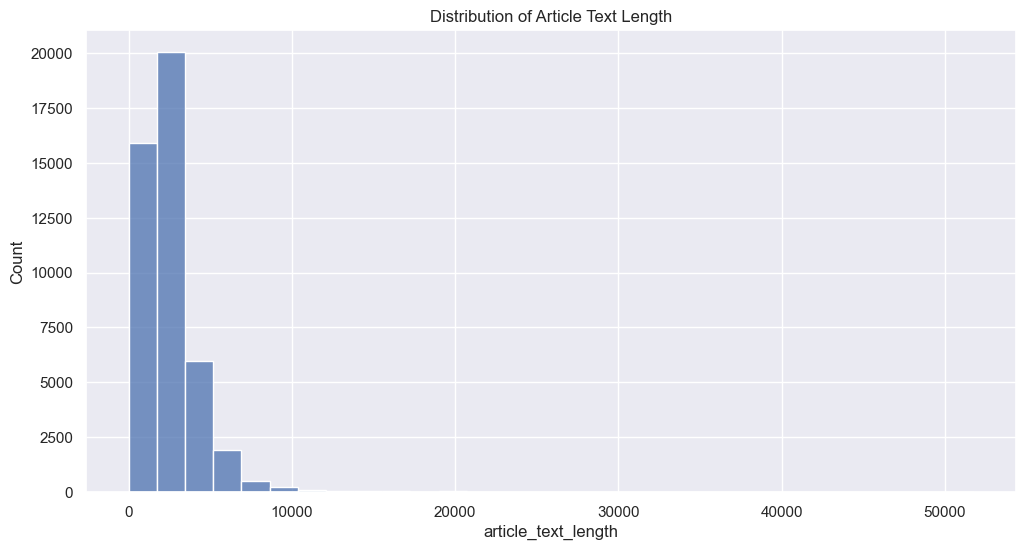

In [89]:
# produce a distrubution of title by number of characters, also do the same with the article_text
combined_df["title_length"] = combined_df["title"].apply(len)
combined_df["article_text_length"] = combined_df["article_text"].apply(len)
# create a visualisation of the distribution of title length
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()
plt.figure(figsize=(12,6))
sns.histplot(data=combined_df, x="title_length", bins=30)
plt.title("Distribution of Title Length")
plt.show()
# create a visualisation of the distribution of article_text length
plt.figure(figsize=(12,6))
sns.histplot(data=combined_df, x="article_text_length", bins=30)
plt.title("Distribution of Article Text Length")
plt.show()
# remove the temporary combined dataframe
del combined_temp_df    

In [101]:
import re

# Function to extract the location, source, and remove the text
def extract_source_and_clean(text):
    # Define the regex pattern to match the source (location + source in parentheses + hyphen)
    pattern = r'^[A-Za-z\s,/.]+ \([A-Za-z]+\) -'  # Match location, source in parentheses, and hyphen
    match = re.match(pattern, text)
    
    if match:
        # Extract the matched portion (location + source + hyphen)
        source = match.group(0).strip()
        
        # Remove the matched portion from the original text to get the cleaned text
        cleaned_text = text.replace(source, '').strip()
        
        return source, cleaned_text
    else:
        return '', text

# Apply the function to the DataFrame
combined_df[['source', 'cleaned_text']] = combined_df['article_text'].apply(lambda x: pd.Series(extract_source_and_clean(x)))
# update null source with UNKNOWN (Unknown) - this is a placeholder for missing data
combined_df['source'].replace('', 'UNKNOWN (Unknown) -', inplace=True)
combined_df['source'].fillna('UNKNOWN (Unknown) -', inplace=True)
# Display the DataFrame with the new 'location', 'source', and 'cleaned_text' fields
combined_df.head(10)

,title,article_text,subject,date,label,title_length,article_text_length,source,cleaned_text,location,source_name
0,"As U.S. budget fight looms, Republicans flip t...",WASHINGTON (Reuters) - The head of a conservat...,politicsNews,"December 31, 2017",1,64,4659,WASHINGTON (Reuters) -,The head of a conservative Republican faction ...,ERROR,ERROR
1,U.S. military to accept transgender recruits o...,WASHINGTON (Reuters) - Transgender people will...,politicsNews,"December 29, 2017",1,64,4077,WASHINGTON (Reuters) -,Transgender people will be allowed for the fir...,ERROR,ERROR
2,Senior U.S. Republican senator: 'Let Mr. Muell...,WASHINGTON (Reuters) - The special counsel inv...,politicsNews,"December 31, 2017",1,60,2789,WASHINGTON (Reuters) -,The special counsel investigation of links bet...,ERROR,ERROR
3,FBI Russia probe helped by Australian diplomat...,WASHINGTON (Reuters) - Trump campaign adviser ...,politicsNews,"December 30, 2017",1,59,2461,WASHINGTON (Reuters) -,Trump campaign adviser George Papadopoulos tol...,ERROR,ERROR
4,Trump wants Postal Service to charge 'much mor...,SEATTLE/WASHINGTON (Reuters) - President Donal...,politicsNews,"December 29, 2017",1,69,5204,SEATTLE/WASHINGTON (Reuters) -,President Donald Trump called on the U.S. Post...,ERROR,ERROR
5,"White House, Congress prepare for talks on spe...","WEST PALM BEACH, Fla./WASHINGTON (Reuters) - T...",politicsNews,"December 29, 2017",1,64,3707,"WEST PALM BEACH, Fla./WASHINGTON (Reuters) -",The White House said on Friday it was set to k...,ERROR,ERROR
6,"Trump says Russia probe will be fair, but time...","WEST PALM BEACH, Fla (Reuters) - President Don...",politicsNews,"December 29, 2017",1,63,3220,"WEST PALM BEACH, Fla (Reuters) -",President Donald Trump said on Thursday he bel...,ERROR,ERROR
7,Factbox: Trump on Twitter (Dec 29) - Approval ...,The following statements were posted to the ve...,politicsNews,"December 29, 2017",1,60,856,UNKNOWN (Unknown) -,The following statements were posted to the ve...,ERROR,ERROR
8,Trump on Twitter (Dec 28) - Global Warming,The following statements were posted to the ve...,politicsNews,"December 29, 2017",1,42,632,UNKNOWN (Unknown) -,The following statements were posted to the ve...,ERROR,ERROR
9,Alabama official to certify Senator-elect Jone...,WASHINGTON (Reuters) - Alabama Secretary of St...,politicsNews,"December 28, 2017",1,76,408,WASHINGTON (Reuters) -,Alabama Secretary of State John Merrill said h...,ERROR,ERROR


In [103]:
# Function to split the source into location and source, removing the parentheses around the source
def split_location_and_source(source):
    if source:
        try:
            # Ensure the source is in the expected format before attempting regex matching
            if "(" not in source or ")" not in source:
                return '', ''  # No valid source found

            # Updated regex to handle more complex locations and sources
            location_match = re.match(r'^[A-Za-z\s,/.&\-0-9]+', source)
            source_name_match = re.match(r'\([A-Za-z0-9/\-\s]+\)', source)
            
            # If both location and source matches are found
            if location_match and source_name_match:
                location = location_match.group(0).strip()  # Extract the location
                source_name = source_name_match.group(0).strip()[1:-1]  # Remove the parentheses from source
                return location, source_name
            else:
                return '', ''  # Return empty if no valid match found
        except Exception as e:
            print(f"Error: {e}")
            # If there is an error, return empty strings
            return 'ERROR', 'ERROR'
    else:
        # If source is empty, return empty strings
        return '', ''

# Apply the function to the DataFrame
combined_df[['location', 'source_name']] = combined_df['source'].apply(split_location_and_source).apply(pd.Series)


In [104]:
combined_df

,title,article_text,subject,date,label,title_length,article_text_length,source,cleaned_text,location,source_name
0,"As U.S. budget fight looms, Republicans flip t...",WASHINGTON (Reuters) - The head of a conservat...,politicsNews,"December 31, 2017",1,64,4659,WASHINGTON (Reuters) -,The head of a conservative Republican faction ...,,
1,U.S. military to accept transgender recruits o...,WASHINGTON (Reuters) - Transgender people will...,politicsNews,"December 29, 2017",1,64,4077,WASHINGTON (Reuters) -,Transgender people will be allowed for the fir...,,
2,Senior U.S. Republican senator: 'Let Mr. Muell...,WASHINGTON (Reuters) - The special counsel inv...,politicsNews,"December 31, 2017",1,60,2789,WASHINGTON (Reuters) -,The special counsel investigation of links bet...,,
3,FBI Russia probe helped by Australian diplomat...,WASHINGTON (Reuters) - Trump campaign adviser ...,politicsNews,"December 30, 2017",1,59,2461,WASHINGTON (Reuters) -,Trump campaign adviser George Papadopoulos tol...,,
4,Trump wants Postal Service to charge 'much mor...,SEATTLE/WASHINGTON (Reuters) - President Donal...,politicsNews,"December 29, 2017",1,69,5204,SEATTLE/WASHINGTON (Reuters) -,President Donald Trump called on the U.S. Post...,,
...,...,...,...,...,...,...,...,...,...,...,...
23476,McPain: John McCain Furious That Iran Treated ...,21st Century Wire says As 21WIRE reported earl...,Middle-east,"January 16, 2016",0,61,3237,UNKNOWN (Unknown) -,21st Century Wire says As 21WIRE reported earl...,,
23477,JUSTICE? Yahoo Settles E-mail Privacy Class-ac...,21st Century Wire says It s a familiar theme. ...,Middle-east,"January 16, 2016",0,81,1684,UNKNOWN (Unknown) -,21st Century Wire says It s a familiar theme. ...,,
23478,Sunnistan: US and Allied ‘Safe Zone’ Plan to T...,Patrick Henningsen 21st Century WireRemember ...,Middle-east,"January 15, 2016",0,85,25065,UNKNOWN (Unknown) -,Patrick Henningsen 21st Century WireRemember ...,,
23479,How to Blow $700 Million: Al Jazeera America F...,21st Century Wire says Al Jazeera America will...,Middle-east,"January 14, 2016",0,67,2685,UNKNOWN (Unknown) -,21st Century Wire says Al Jazeera America will...,,


In [ ]:
# using sklearn preprocessing StandardScaler() - this standardises the data: it centres variable at 0 and scales to have a variance of 1
# this isachieved by subtracting the mean and dividing by the standard deviation.  This is also known as the Z-score
# this is useful when the data has different units of measurement
from sklearn.preprocessing import StandardScaler


In [ ]:
# create a pipeline apply all previous cleansing steps to the data
# this pipeline will be used to transform the data before training the model
# the pipeline will include the following steps:
# 1. Extract the source and clean the text
# 2. Split the location and source
# 3. Standardise the title length and article text length
# 4. Drop the original columns
# 5. Standardise the data
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import OneHotEncoder
from sklearn.impute import SimpleImputer
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import FunctionTransformer

pipeline = Pipeline([
    ('data import', FunctionTransformer(lambda x: x)),
    ('source_cleaning', FunctionTransformer(extract_source_and_clean)),
    ('split_location_source', FunctionTransformer(split_location_and_source)),
    ('standardise', ColumnTransformer([
        ('num', StandardScaler(), ['title_length', 'article_text_length']),
        ('cat', OneHotEncoder(), ['source_name', 'location'])
    ], remainder='drop'))
])



In [ ]:
import re
# Re-import necessary libraries since execution state was reset
import pandas as pd

# Reload the dataset
file_path = "data//unique_locations.csv"
df = pd.read_csv(file_path)

# Display the first few rows
df.head()

# Function to extract state information from address
def extract_state_from_address(address):
    if pd.isna(address):
        return None
    
    # Pattern to match state-like formats (U.S. states, UK counties, etc.)
    state_patterns = [
        r", ([A-Z]{2}) \d{5}, USA",   # US State (e.g., NY 10001, USA)
        r", ([A-Za-z\s]+) \d{4}, Australia",  # Australian states with postal codes
        r", ([A-Za-z\s]+), UK",  # UK counties
        r", ([A-Za-z\s]+) \d{5}, France",  # French departments
        r", ([A-Za-z\s]+), Canada",  # Canadian provinces
        r", ([A-Za-z\s]+), New Zealand",  # New Zealand regions
        r", ([A-Za-z\s]+), India",  # Indian states
        r", ([A-Za-z\s]+), Argentina",  # Argentine provinces
    ]
    
    for pattern in state_patterns:
        match = re.search(pattern, address)
        if match:
            return match.group(1).strip()

    return None

# Apply function to extract states
df['corrected_state'] = df.apply(
    lambda row: row['state'] if pd.notna(row['state']) else extract_state_from_address(row['address']),
    axis=1
)

# Ensure the state column has consistent capitalization and formatting
df['corrected_state'] = df['corrected_state'].str.title()

# Replace missing or incorrect country names using address
df['corrected_country'] = df.apply(
    lambda row: row['country'] if pd.notna(row['country']) else row['address'].split(",")[-1].strip()
    if pd.notna(row['address']) else None,
    axis=1
)

df
#save df to csv
df.to_csv("data//unique_locations.csv", index=False)